## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [26]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
train, test = keras.datasets.cifar10.load_data()

In [28]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [29]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [30]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(activation='relu', units=n_units, name='hidden_layer'+str(i))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(activation='relu', units=n_units, name='hidden_layer'+str(i))(x)
            x = BatchNormalization()(x)
    out = keras.layers.Dense(activation='softmax', units=output_units, name='output')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [31]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [32]:
# 載入 Callbacks
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor="val_accuracy", 
                          patience=10, 
                          verbose=1)

results = {}

model = build_mlp(x_train.shape[1:])
model.summary()
opt = keras.optimizers.SGD(lr=LEARNING_RATE, momentum=MOMENTUM, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[earlystop], shuffle=True, validation_data=(x_test, y_test))
train_loss = model.history.history["loss"]
val_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
val_acc = model.history.history["val_accuracy"]

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_15 (Batc (None, 128)               512 

In [33]:
results["es-val_acc-10"] = {
                         "train_loss": train_loss,
                         "val_loss": val_loss,
                         "train_acc": train_acc,
                         "val_acc": val_acc}

In [34]:
# 載入 Callbacks
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor="val_accuracy", 
                          patience=25, 
                          verbose=1)


model = build_mlp(x_train.shape[1:])
model.summary()
opt = keras.optimizers.SGD(lr=LEARNING_RATE, momentum=MOMENTUM, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[earlystop], shuffle=True, validation_data=(x_test, y_test))
train_loss = model.history.history["loss"]
val_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
val_acc = model.history.history["val_accuracy"]

results["es-val_acc-25"] = {
                         "train_loss": train_loss,
                         "val_loss": val_loss,
                         "train_acc": train_acc,
                         "val_acc": val_acc}

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_18 (Batc (None, 128)               512 

50000/50000 [==============================] - 2s 40us/step - loss: 0.5567 - accuracy: 0.8352 - val_loss: 1.5947 - val_accuracy: 0.4900
Epoch 47/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.5417 - accuracy: 0.8426 - val_loss: 1.6187 - val_accuracy: 0.4905
Epoch 48/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.5243 - accuracy: 0.8488 - val_loss: 1.6393 - val_accuracy: 0.4902
Epoch 49/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.5080 - accuracy: 0.8551 - val_loss: 1.6383 - val_accuracy: 0.4927
Epoch 50/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.4914 - accuracy: 0.8624 - val_loss: 1.6450 - val_accuracy: 0.4954


In [37]:
results

{'es-val_acc-10': {'train_loss': [2.2129084267807007,
   1.7468110578918457,
   1.6224116156005859,
   1.5504815105819703,
   1.4978245624542237,
   1.4491095809173584,
   1.4103024774932862,
   1.3717792211532593,
   1.3408806619262694,
   1.3091039693069457,
   1.2801907747268677,
   1.2527370803070068,
   1.225317229423523,
   1.200501792945862,
   1.1754056455993653,
   1.1509004767608642,
   1.126752905960083,
   1.1049450271224976,
   1.0815623680114745,
   1.060093776550293,
   1.0396196615219115,
   1.0181567013931274,
   0.9971447863006592,
   0.9746522635269165,
   0.9523309012031556,
   0.933362862701416,
   0.9123188638877868,
   0.8925388053321839,
   0.8732177954292297,
   0.8521871048545837,
   0.8335770998954773,
   0.8123153293228149,
   0.7946218372344971,
   0.7733728096771241,
   0.7561638038063049,
   0.7357639298629761,
   0.7175520250320434,
   0.6980840369796752,
   0.6804500631141662,
   0.6607995528411865,
   0.6437962614822388,
   0.6256150798225403,
   0.607

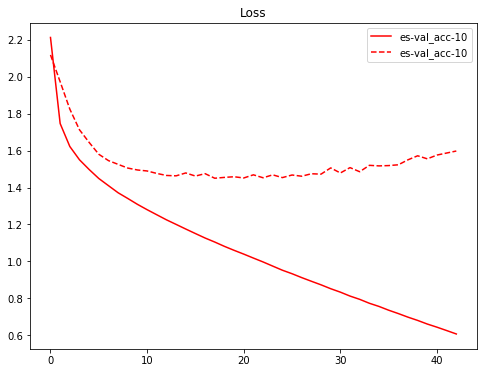

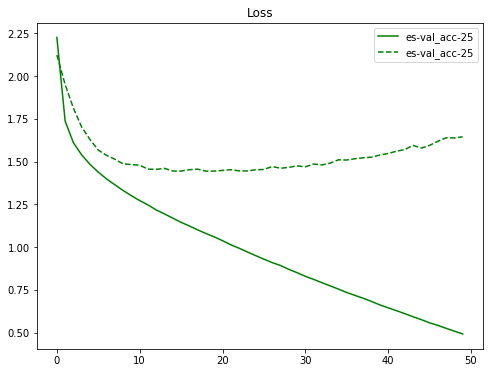

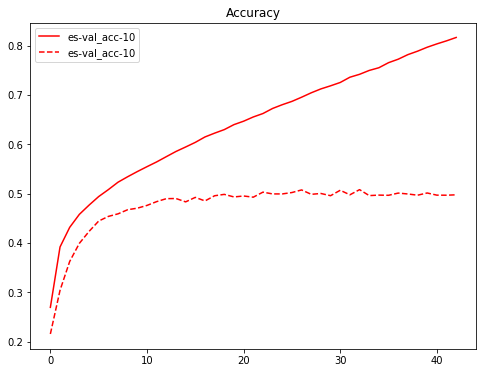

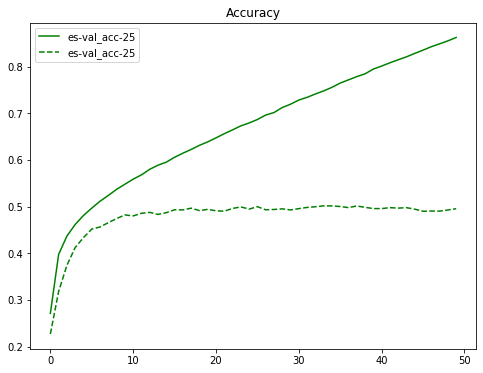

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b"]

for i, cond in enumerate(results.keys()):
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(results[cond]["train_loss"])), results[cond]["train_loss"], "-", label=cond , c=color_bar[i])
    plt.plot(range(len(results[cond]["val_loss"])), results[cond]["val_loss"], "--", label=cond, c=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()
for i, cond in enumerate(results.keys()):
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(results[cond]["train_acc"])), results[cond]["train_acc"], "-", label=cond , c=color_bar[i])
    plt.plot(range(len(results[cond]["val_acc"])), results[cond]["val_acc"], "--", label=cond , c=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()